# **Ozone Pollution Analysis & Recommendations**

**Background:**
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

# **Executive Summary:**
**Insights:**
Ozone concentration peaks during summer months (June–August).
Weekdays show slightly higher ozone levels than weekends, likely due to traffic/emissions.
Riverside, Tulare, and San Bernardino countries have consistently high ozone levels.

**Recommendations:**
Encourage public transport and low-emission zones in high-risk counties.
Increase monitoring coverage during summer.
Promote weekend-style traffic restrictions on weekdays in polluted areas.

# **Introduction:**
Ozone pollution is a major concern for public health, especially in urban and industrial regions.
This notebook analyzes daily ozone air quality data across various counties in California, aiming to identify spatial and temporal patterns in pollution levels.

**We investigate:**
Seasonal variations (e.g. higher levels during summer)
Weekday vs. weekend differences
High-risk counties with consistently elevated ozone levels
Our goal is to uncover actionable insights that can support environmental policy and improve air quality monitoring and control efforts.

In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

Saving ozone (1).csv to ozone (1).csv


In [15]:
df = pd.read_csv("ozone (1).csv")

/tmp/ipython-input-43195366.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


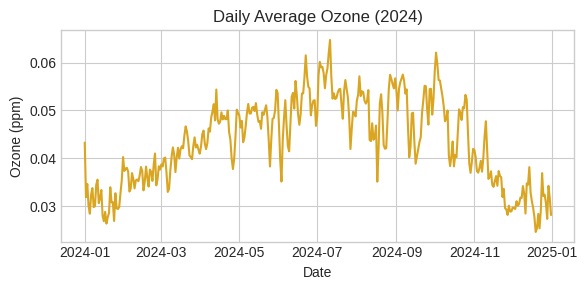

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('ozone (1).csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing ozone values
df = df.dropna(subset=['daily_max_8-hour_ozone_concentration'])

# Set a simple style for plots
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Daily Ozone Trend
daily_avg = df.groupby('date')['daily_max_8-hour_ozone_concentration'].mean().reset_index()

plt.figure(figsize=(6, 3))
plt.plot(daily_avg['date'], daily_avg['daily_max_8-hour_ozone_concentration'], color='goldenrod')
plt.title("Daily Average Ozone (2024)", fontsize=12)
plt.xlabel("Date")
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()

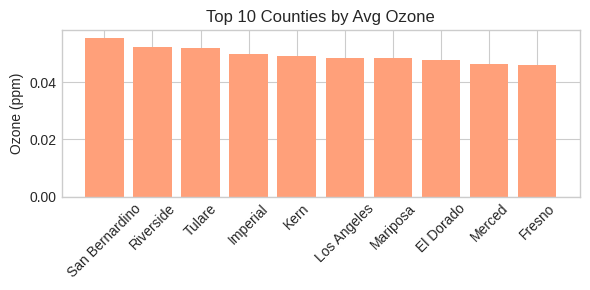

In [6]:
# 2. Top 10 Counties
county_avg = df.groupby('county')['daily_max_8-hour_ozone_concentration'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 3))
plt.bar(county_avg.index, county_avg.values, color='lightsalmon')
plt.title("Top 10 Counties by Avg Ozone", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()

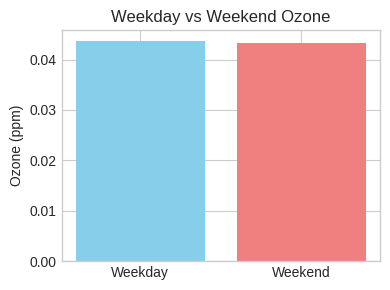

In [9]:
# 3. Weekday vs Weekend
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
weekend_avg = df.groupby('is_weekend')['daily_max_8-hour_ozone_concentration'].mean()

plt.figure(figsize=(4, 3))
plt.bar(['Weekday', 'Weekend'], weekend_avg.values, color=['skyblue', 'lightcoral'])
plt.title("Weekday vs Weekend Ozone", fontsize=12)
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()


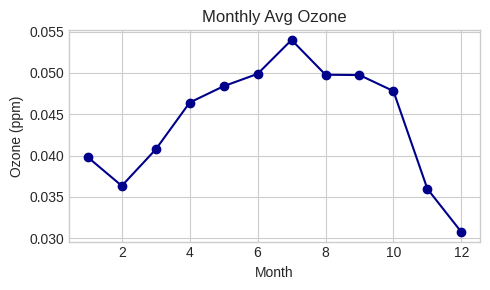

In [10]:
# 4. Monthly Trend
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['daily_max_8-hour_ozone_concentration'].mean()

plt.figure(figsize=(5, 3))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='darkblue')
plt.title("Monthly Avg Ozone", fontsize=12)
plt.xlabel("Month")
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()


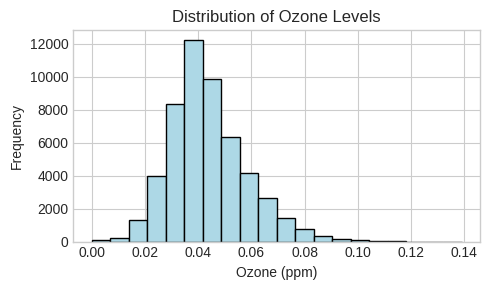

In [11]:
# 5.Histogram showing the distribution of ozone levels
plt.figure(figsize=(5,3))
plt.hist(df['daily_max_8-hour_ozone_concentration'], bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of Ozone Levels", fontsize=12)
plt.xlabel("Ozone (ppm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

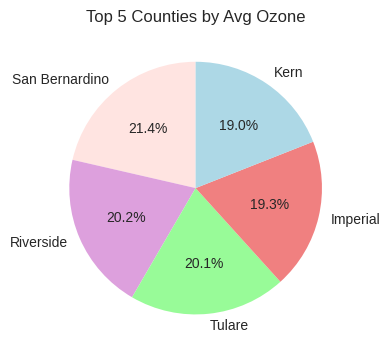

In [18]:
# 6.Pie chart showing the top 5 counties by average ozone levels
 top5_counties = county_avg.head(5)

plt.figure(figsize=(4,4))
top5_counties.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['mistyrose','plum','palegreen','lightcoral','lightblue']
)
plt.title("Top 5 Counties by Avg Ozone")
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()


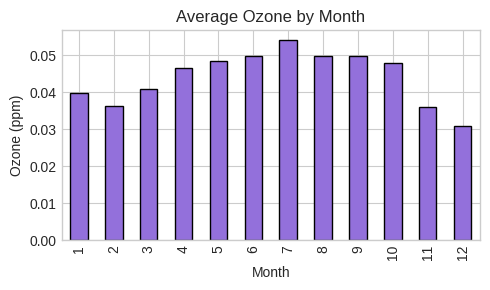

In [14]:
# 7.Bar chart showing average ozone levels for each month
avg_by_month = df.groupby('month')['daily_max_8-hour_ozone_concentration'].mean()

plt.figure(figsize=(5,3))
avg_by_month.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title("Average Ozone by Month", fontsize=12)
plt.xlabel("Month")
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()